___
<a href='https://cafe.naver.com/jmhonglab'><p style="text-align:center;"><img src='https://lh3.googleusercontent.com/lY3ySXooSmwsq5r-mRi7uiypbo0Vez6pmNoQxMFhl9fmZJkRHu5lO2vo7se_0YOzgmDyJif9fi4_z0o3ZFdwd8NVSWG6Ea80uWaf3pOHpR4GHGDV7kaFeuHR3yAjIJjDgfXMxsvw=w2400'  class="center" width="50%" height="50%"/></p></a>
___
<center><em>Content Copyright by HongLab, Inc.</em></center>

# 디지털 이미지 연습문제

앞에서 Pillow를 통해 사용해본 이미지 조작/변환 알고리즘들 중 몇 가지를 Numpy를 이용해서 직접 구현해보겠습니다. 결과를 눈으로 볼 수 있기 때문에 좋은 파이썬 프로그래밍 연습이 될 뿐 아니라 나중에 코테준비(특히 2차원 배열을 사용하는 중급 이상 문제들)에 도움이 크게 됩니다.

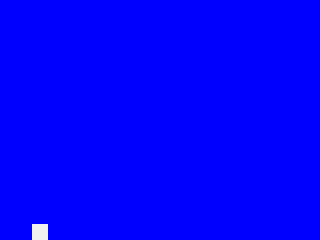

In [7]:
""" 디지털 이미지 기본설정 확인 """

# 이미지 좌표계 확인
from PIL import Image
import numpy as np

# 배열 초기화
arr = np.full(
    (15, 20, 3), (0, 0, 255), dtype=np.uint8
)  # 높이, 넓이, 색의 갯수 순 / 색들의 초기값 / 자료형

# 점 찍기
arr[14, 2] = (
    240,
    240,
    240,
)  # Gray color / 이차원배열의 인덱스는 높이, 넓이 순으로 한계가 있음

# Pillow Image로 변환 (clip, astype)
im = Image.fromarray(arr.clip(0, 255).astype(np.uint8))  # data type 바꿔주기
# 픽셀을 분명하게 보기 위해서 NEAREST로 upsampling
im = im.resize((320, 240), resample=Image.NEAREST)
im


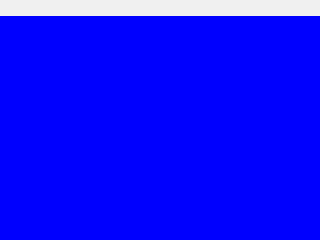

In [9]:
# (0, 0) -> (19, 0) 가로 직선
from PIL import Image
import numpy as np

arr = np.full((15, 20, 3), (0, 0, 255), dtype=np.uint8)

for i in range(20):
    arr[0, i] = (240, 240, 240)

im = Image.fromarray(arr.clip(0, 255).astype(np.uint8))  # data type 바꿔주기
im = im.resize((320, 240), resample=Image.NEAREST)
im


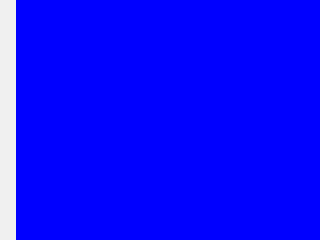

In [11]:
# (0, 0) -> (0, 14) 세로 직선
from PIL import Image
import numpy as np

arr = np.full((15, 20, 3), (0, 0, 255), dtype=np.uint8)
for i in range(15):
    arr[i, 0] = (240, 240, 240)


im = Image.fromarray(arr.clip(0, 255).astype(np.uint8))  # data type 바꿔주기
im = im.resize((320, 240), resample=Image.NEAREST)
im


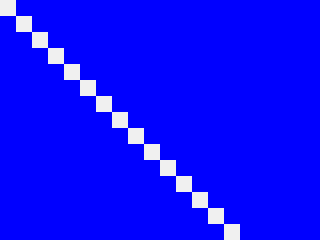

In [12]:
# (0, 0) -> (14, 14) 45도 기울어진 선분 그리기
from PIL import Image
import numpy as np

arr = np.full((15, 20, 3), (0, 0, 255), dtype=np.uint8)
for i in range(15):
    arr[i, i] = (240, 240, 240)


im = Image.fromarray(arr.clip(0, 255).astype(np.uint8))  # data type 바꿔주기
im = im.resize((320, 240), resample=Image.NEAREST)
im


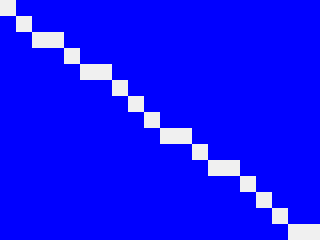

In [17]:
# (0, 0) -> (19, 14) 임의의 기울기를 가진 선분 (Pillow)
from PIL import Image, ImageDraw
import numpy as np

arr = np.full((15, 20, 3), (0, 0, 255), dtype=np.uint8)

for j in range(20):
    arr[round(3 * j / 4), j] = (240, 240, 240)

im = Image.fromarray(arr.clip(0, 255).astype(np.uint8))
im = im.resize((320, 240), resample=Image.NEAREST)

im


(0, 0)에서 (19, 14)로 임의의 기울기를 가진 선분 그리기

1. 일반적인 [직선의 방정식](https://terms.naver.com/entry.naver?docId=5685306&cid=40942&categoryId=32223)은 $y = ax + b$ 형태이다. 여기서 $a$는 $x$가 증가할때 $y$가 증가하는 비율인 기울기이고 $b$는 이 직선이 $y$ 축과 만나는 $y$ 절편이다.
1. 주어진 문제에서 $a$와 $b$를 구하면 $x$에 대해 $y$가 몇 인지를 계산할 수 있다.
1. (0, 0)을 지나기 때문에 $b$는 0이다.
1. $x$ 방향으로 0에서 19, $y$ 방향으로 0에서 14로 이동하기 때문에 기울기 $a = 14/19$ 이다.
1. 예를 들어서 $x$가 3일 때 $y = 14/19 \times x + 0 = 2.21$이다. 정수 인덱스를 얻기 위해 반올림을 하면 round(2.21)은 2이기 때문에 (3, 2)에 점을 찍는다.

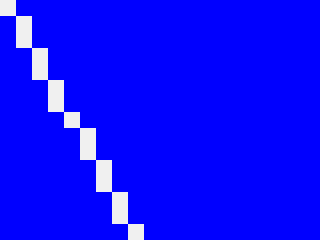

In [20]:
# (0, 0) -> (8, 14) 임의의 기울기를 가진 선분
from PIL import Image
import numpy as np

arr = np.full((15, 20, 3), (0, 0, 255), dtype=np.uint8)

a = 8 / 14

for j in range(15):
    arr[j, round(j * a)] = (240, 240, 240)


im = Image.fromarray(arr.clip(0, 255).astype(np.uint8))  # data type 바꿔주기
im = im.resize((320, 240), resample=Image.NEAREST)
im


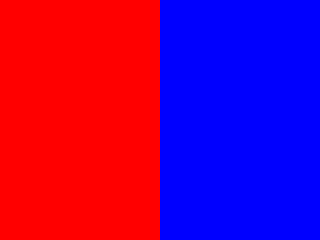

In [24]:
# 좌우 나누기
from PIL import Image
import numpy as np

arr = np.full((240, 320, 3), (0, 0, 255), dtype=np.uint8)

# 내 방법: 반복문 활용
# for i in range(240):
#     for j in range(160):
#         arr[i, j] = (255, 0, 0)
#     for j in range(160, 320):
#         arr[i, j] = (0, 0, 255)

# 모범답안: 슬라이싱활용
arr[:, :160] = (255, 0, 0)


im = Image.fromarray(arr.clip(0, 255).astype(np.uint8))  # data type 바꿔주기

im


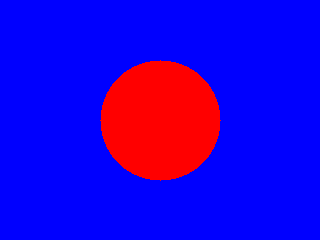

In [32]:
# 원 그리기
from PIL import Image
import numpy as np

arr = np.empty((240, 320, 3), dtype=np.uint8)
center_x, center_y, r = 120, 160, 60

for i in range(240):
    for j in range(320):
        arr[i, j] = (
            (255, 0, 0)
            if (center_x - i) ** 2 + (center_y - j) ** 2 <= r**2
            else (0, 0, 255)
        )


im = Image.fromarray(arr.clip(0, 255).astype(np.uint8))  # data type 바꿔주기

im


(135, 240, 3) uint8


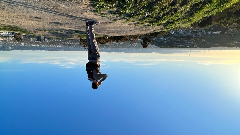

In [36]:
# hflip, vflip, 4분의 1로 downsize
from PIL import Image
import numpy as np

im = Image.open("baldwin_hills.jpg")

# print(im.size) # (960, 540)

arr = np.asarray(im)

# hflip
arr = arr[:, ::-1]

# vflip
arr = arr[::-1, :]

# 4분의 1로 줄이기
arr = arr[::4, ::4]

print(arr.shape, arr.dtype)  # (540, 960, 3) uint8


im = Image.fromarray(arr)  # .resize((480, 270))

im


힌트: ```ValueError: assignment destination is read-only``` 오류가 발생할 경우에는 [.copy()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.copy.html)를 사용해보세요.

(540, 960, 3) uint8


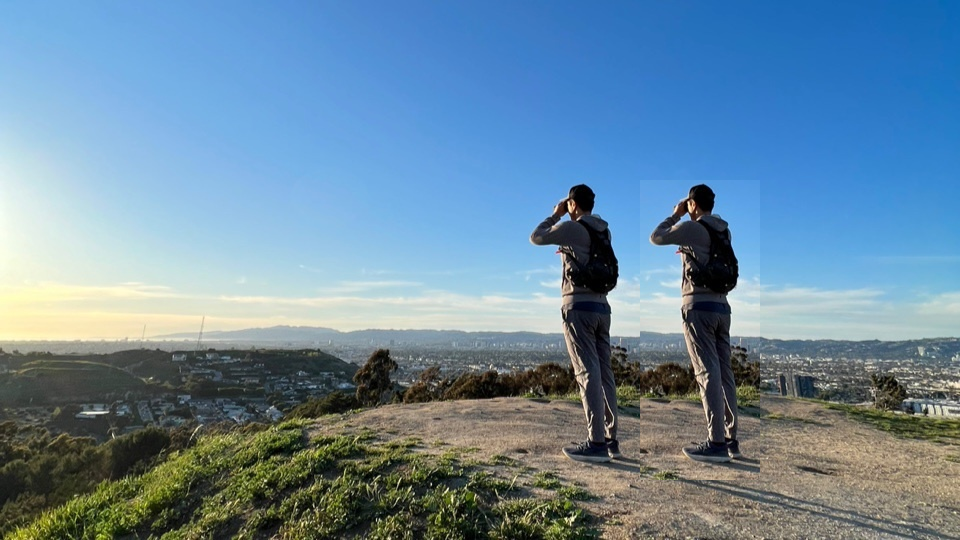

In [38]:
# crop and paste

from PIL import Image
import numpy as np

im = Image.open("baldwin_hills.jpg")

# print(im.size) # (960, 540)
cropped = im.crop((520, 180, 640, 480))
im.paste(cropped, (640, 180, 760, 480))

arr = np.asarray(im)
print(arr.shape, arr.dtype)  # (540, 960, 3) uint8


im = Image.fromarray(arr)

im


반투명한 박스를 그려보겠습니다. [Pillow의 alpha_composite](https://github.com/python-pillow/Pillow/blob/95cff6e959bb3c37848158ed2145d49d49806a31/src/libImaging/AlphaComposite.c)에서 사용하는 [Alpha compositing 알고리즘](https://en.wikipedia.org/wiki/Alpha_compositing)을 단순화 시켜서 구현해보겠습니다. 

원본 픽셀의 색이 alpha가 없는 $(r_1, g_1, b_1)$이고 덮어 그리려는 박스의 색이 $(r_2, g_2, b_2, a)$라면 새로운 픽셀의 색은 $(r_2, g_2, b_2) \cdot a + (r_1, g_1, b_1) \cdot (1-a)$로 계산할 수 있습니다.



(540, 960, 3) uint8
(540, 960, 3) float64


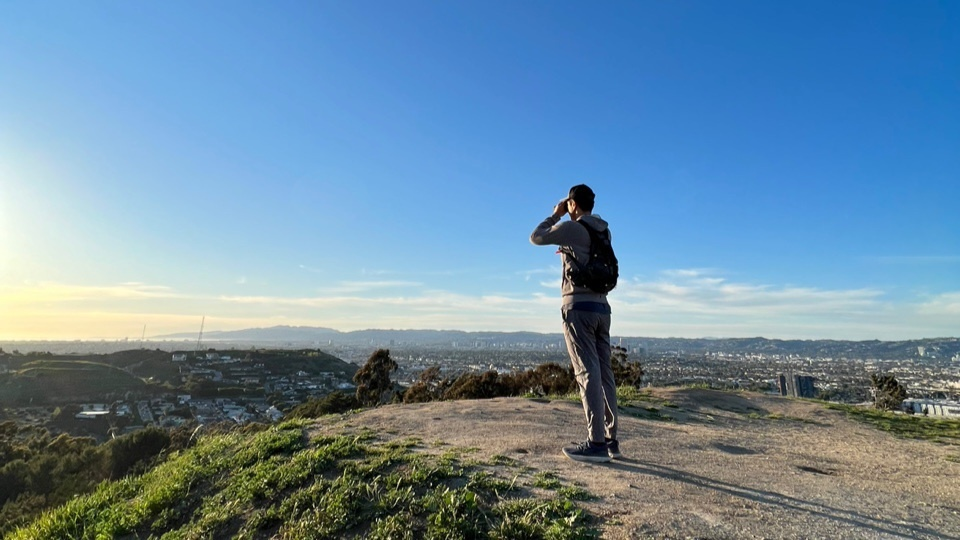

In [39]:
from PIL import Image
import numpy as np

im = Image.open("baldwin_hills.jpg")

# print(im.size) # (960, 540)

arr = np.asarray(im)
print(arr.shape, arr.dtype)  # (540, 960, 3) uint8

arr = arr.astype(np.float64)  # float로 변환



arr = arr.clip(0, 255)

print(arr.shape, arr.dtype)

im = Image.fromarray(arr.astype(np.uint8))

im


In [ ]:
# 격자 형태로 배치

from PIL import Image
import numpy as np

im = Image.open("baldwin_hills.jpg").resize((480, 270))

# print(im.size) # (960, 540)

arr = np.asarray(im)
print(arr.shape, arr.dtype)  # (540, 960, 3) uint8


im = Image.fromarray(arr)

im


[RGB를 YUV의 휘도(luminance)로 변환](https://en.wikipedia.org/wiki/YUV#Conversion_to/from_RGB) 

$Y = 0.2989 \times r + 0.5870 \times g + 0.1140 \times b$

주의: R, G, B 중 한 채널만 출력해도 흑백 이미지가 만들어집니다. 얼핏 봤을 때는 RGB를 모두 사용해서 휘도를 계산한 것과 한 채널만으로 흑백을 만든 것을 구분하지 못할 수도 있습니다. 세 채널 모두 사용해서 휘도를 계산하도록 주의하세요.

In [ ]:
# 컬러에서 흑백

# hflip, vflip, downsize
from PIL import Image
import numpy as np

im = Image.open("baldwin_hills.jpg")

# print(im.size) # (960, 540)

arr = np.asarray(im)
print(arr.shape, arr.dtype)  # (540, 960, 3) uint8


im = Image.fromarray(arr.clip(0, 255).astype(np.uint8))  # data type 바꿔주기

im
